#Assignment_4


##The size of your data size should be 30,000 for training data and 5000 for test data.
##One Hot encode your targets/ outputs.

##Define five different models (KNN, Support vector machine, Decision tree, DNN)
##Achieve a testing accuracy of 95% and loss of 0.1.
##Plot the loss/validation loss value over the training  for the DNN models.
##Calculate necessary metrics for the models
##Choose the best model

In [ ]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics,model_selection,preprocessing,neighbors,linear_model,svm,tree
import pandas as pd

##Preprocessing and data distribution

shape of x_train: (60000, 28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0 

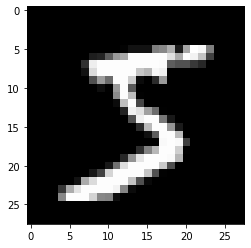

In [ ]:
#load mnist dataset 
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()

print('shape of x_train:',x_train.shape)
print(x_train[0])
print('the label of x_train[0] is :',y_train[0])

#show an image 
plt.imshow(x_train[0],cmap='gray')

shape of x_train: (60000, 784)
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.

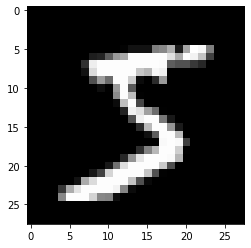

In [ ]:
#reshape the data
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

#normalize the pixel values so that each pixel value has a value between 0 and 1.
x_train,x_test=x_train/255,x_test/255

print('shape of x_train:',x_train.shape)
print(x_train[0])
#show an image 
plt.imshow(x_train[0].reshape(28,28),cmap='gray')


In [ ]:
#convert the labels to one-hot vector for y_train and y_test, using one-hot encodeing 
y_train_hot=tf.one_hot(y_train,depth=len(set(y_train)))
y_test_hot=tf.one_hot(y_test,depth=len(set(y_train)))
#validation data
x_val=x_train[:5000]
y_val=y_train_hot[:5000]
#resize of dataset 
x_train=x_train[30000:]
y_train=y_train[30000:]
x_test=x_test[5000:]
y_test=y_test[5000:]

y_train_hot=y_train_hot[30000:]
y_test_hot=y_test_hot[5000:]


##KNN

In [ ]:
#Create KNN Classifier
eigh =neighbors.KNeighborsClassifier(n_neighbors=10)
# Train the model using the training sets
eigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [ ]:
#Predict Output
y_pred=eigh.predict(x_test)
#print the accuracy
print(metrics.accuracy_score(y_test,y_pred))

0.978


###testing

Precision Score: 0.978155011667437
Recall Score: 0.978


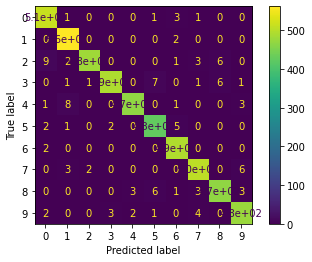

In [ ]:
precision = metrics.precision_score(y_test, y_pred,average='weighted')
print("Precision Score:", precision)
recall = metrics.recall_score(y_test, y_pred,average='weighted')
print("Recall Score:", recall)
metrics.plot_confusion_matrix(eigh,x_test,y_test)#plot confusion matrix

##Support vector machine

In [ ]:
# Create SVM classifer
svm_model= svm.SVC(kernel='linear',C=1)
# Train SVM Classifer
svm_model.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
pred=svm_model.predict(x_test)##Predict the response for test dataset
print(metrics.accuracy_score(y_test,pred))# Model Accuracy

0.9502


###testing

acc is 0.978
precision_score is 0.978
recall_score is 0.978
f1_score is 0.978


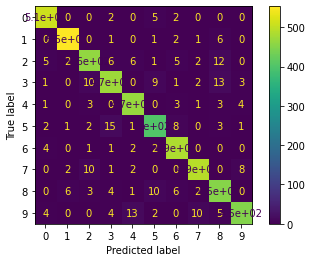

In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
precision_score=metrics.precision_score(y_test,y_pred,average='micro')
recall_score=metrics.recall_score(y_test,y_pred,average='micro')
f1_score=metrics.f1_score(y_test,y_pred,average='micro')
print(f'acc is {acc}')
print(f'precision_score is {precision_score}')
print(f'recall_score is {recall_score}')
print(f'f1_score is {f1_score}')
metrics.plot_confusion_matrix(svm_model,x_test,y_test)

##Decision tree

In [ ]:
# Create Decision Tree classifer 
clf = tree.DecisionTreeClassifier()
# Train Decision Tree Classifer
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
#Predict the response for test dataset
y_pred=clf.predict(x_test)
# Model Accuracy
print(metrics.accuracy_score(y_test,y_pred))



0.875


###testing

acc is 0.875
precision_score is 0.875
recall_score is 0.875
f1_score is 0.875


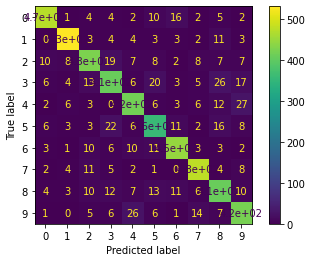

In [ ]:
acc=metrics.accuracy_score(y_test,y_pred)
precision_score=metrics.precision_score(y_test,y_pred,average='micro')
recall_score=metrics.recall_score(y_test,y_pred,average='micro')
f1_score=metrics.f1_score(y_test,y_pred,average='micro')
print(f'acc is {acc}')
print(f'precision_score is {precision_score}')
print(f'recall_score is {recall_score}')
print(f'f1_score is {f1_score}')
metrics.plot_confusion_matrix(clf,x_test,y_test)

##DNN

In [ ]:
#creat a Sequentail model using keras 
model=tf.keras.models.Sequential([
                   
                                  tf.keras.layers.Input(shape=(784)),
                                  tf.keras.layers.Dense(units=64,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_1'),
                                  tf.keras.layers.Dropout(0.3),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_2'),
                                  tf.keras.layers.Dropout(0.4),
                                  tf.keras.layers.Dense(units=256,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_3'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=128,activation=tf.nn.leaky_relu,kernel_initializer=tf.initializers.he_uniform(seed=42),name='layer_4'),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(units=10,activation=tf.nn.softmax,name='output')
                    
                                  
])

In [ ]:
model.summary()#show the model info 

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dropout_20 (Dropout)         (None, 64)                0         
_________________________________________________________________
layer_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_21 (Dropout)         (None, 128)               0         
_________________________________________________________________
layer_3 (Dense)              (None, 256)               33024     
_________________________________________________________________
dropout_22 (Dropout)         (None, 256)               0         
_________________________________________________________________
layer_4 (Dense)              (None, 128)              

In [ ]:
#compile the model an using adam optimizer with Categorical crossentropy cost function
model.compile(optimizer=tf.optimizers.Adam(),loss=tf.losses.CategoricalCrossentropy(),metrics=[tf.metrics.CategoricalAccuracy()])
#train the model with batch_size=32,for 40 epochs 
model.fit(x=x_train,y=y_train_hot,batch_size=32,epochs=40,validation_data=(x_val,y_val))

Epoch 1/40
938/938 [==============================] - 5s 5ms/step - loss: 0.7896 - categorical_accuracy: 0.7431 - val_loss: 0.2960 - val_categorical_accuracy: 0.9214
Epoch 2/40
938/938 [==============================] - 4s 5ms/step - loss: 0.4282 - categorical_accuracy: 0.8749 - val_loss: 0.2183 - val_categorical_accuracy: 0.9380
Epoch 3/40
938/938 [==============================] - 4s 5ms/step - loss: 0.3600 - categorical_accuracy: 0.8940 - val_loss: 0.1985 - val_categorical_accuracy: 0.9412
Epoch 4/40
938/938 [==============================] - 4s 4ms/step - loss: 0.3254 - categorical_accuracy: 0.9072 - val_loss: 0.1973 - val_categorical_accuracy: 0.9438
Epoch 5/40
938/938 [==============================] - 4s 4ms/step - loss: 0.3069 - categorical_accuracy: 0.9112 - val_loss: 0.1719 - val_categorical_accuracy: 0.9520
Epoch 6/40
938/938 [==============================] - 4s 5ms/step - loss: 0.2877 - categorical_accuracy: 0.9181 - val_loss: 0.1759 - val_categorical_accuracy: 0.9502
Epoc

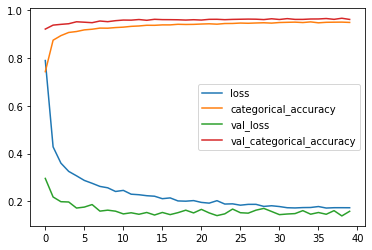

In [ ]:
hist=pd.DataFrame(model.history.history)#plot history
hist.plot()

In [ ]:
#test the model on the test dataset 
pred=model.predict(x_test)
tf.argmax(pred,axis=-1)

<tf.Tensor: shape=(5000,), dtype=int64, numpy=array([3, 9, 9, ..., 4, 5, 6])>

###testing

In [ ]:
acc=tf.reduce_mean(tf.metrics.categorical_accuracy(y_test_hot,pred))#model accuracy
print('acc:',acc)
loss=tf.reduce_mean(tf.metrics.categorical_crossentropy(y_test_hot,pred))#loss
print('loss:',loss)
pr=metrics.precision_score(y_test,np.argmax(pred,-1),average='weighted')#precision
print('pr:',pr)
re=metrics.recall_score(y_test,np.argmax(pred,-1),average='weighted')#recall
print('re:',re)
confusion_matrix=metrics.confusion_matrix(y_test,np.argmax(pred,-1))

acc: tf.Tensor(0.9776, shape=(), dtype=float32)
loss: tf.Tensor(0.089407995, shape=(), dtype=float32)
pr: 0.9777670986838856
re: 0.9776


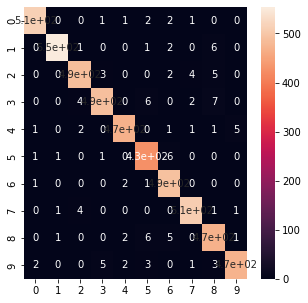

In [ ]:
import seaborn as sns
plt.figure(figsize=(5,5))
sns.heatmap(confusion_matrix,annot=True,)

#Choose the best model

In [ ]:
# the best model is DNN 
#acc: 0.9776 
#loss: 0.089407995
#pr: 0.9777670986838856
#re: 0.9776